In [1]:
import hddCRP.simulations
import hddCRP.modelFittingSequential
import hddCRP.behaviorDataHandlers
import numpy as np
import matplotlib.pyplot as plt

In [94]:
session_lengths = [50]
session_labels = ["A"]
nms = 10;


depth  = 2; # look 2 actions in the past
alphas = [10,5,5] # concentration parameters: per depth in the hddCRP tree. alphas[0] first level (no action context), alphas[1] is the second (for regularizing p(y_t | y_{t-1})), etc...
between_session_time_constants = np.array([[ 1]]) # units = sessions
within_session_time_constant = [40] # units = actions
nback_scales = [1.2, 1.0] # units = actions


prior_scales = {"alpha" : 5, "tau_within" : 25, "tau_between" : 5, "nback" : 1/20}
prior_shapes = {"alpha" : 2, "tau_within" :  2, "tau_between" : 2, "nback" : 20}
fit_nback_scales = True
single_concentration_parameter = False
fit_depth = 2

action_labels = [0,1,2]


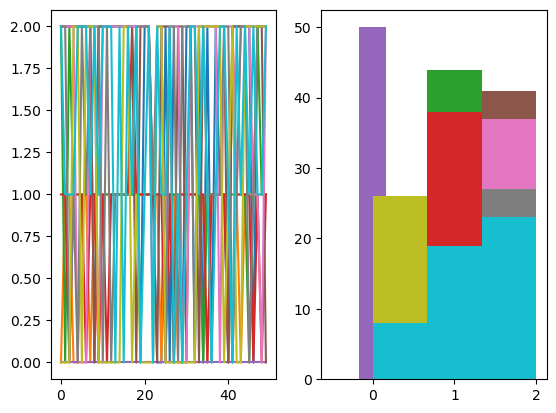

In [101]:

rng_seed_sim = 104 ;
rng_sim = np.random.Generator(np.random.MT19937(rng_seed_sim))
rng_seed_fit =  202 ;
rng_fit = np.random.Generator(np.random.MT19937(rng_seed_fit))
models = [];
for ii in range(nms):
        seqs, connection_data = hddCRP.simulations.simulate_sequential_hddCRP(session_lengths, session_labels, action_labels, depth, rng_sim, alphas, 
                between_session_time_constants = between_session_time_constants, within_session_time_constant = within_session_time_constant, nback_scales=nback_scales)
        model = hddCRP.behaviorDataHandlers.create_hddCRP(seqs, session_labels, rng=rng_fit, depth=depth, fit_nback_scales=fit_nback_scales)
        models += [model]

for model in models:
        plt.subplot(1,2,1)
        plt.plot(model._Y_compact)
        plt.subplot(1,2,2)
        plt.hist(model._Y_compact,3)


In [96]:
num_samples = 1000
num_warmup_samples = 1000


models, samples, step_size_settings = hddCRP.behaviorDataHandlers.sample_population_model_for_maze_data(models, num_samples=num_samples, 
                num_warmup_samples=num_warmup_samples, print_every=100,  prior_shapes=prior_shapes, prior_scales=prior_scales, 
                single_concentration_parameter=single_concentration_parameter)


Sample 0 / 2000
Sample 100 / 2000
Sample 200 / 2000
Sample 300 / 2000
Sample 400 / 2000
Sample 500 / 2000
Sample 600 / 2000
Sample 700 / 2000
Sample 800 / 2000
Sample 900 / 2000
Sample 1000 / 2000
Sample 1100 / 2000
Sample 1200 / 2000
Sample 1300 / 2000
Sample 1400 / 2000
Sample 1500 / 2000
Sample 1600 / 2000
Sample 1700 / 2000
Sample 1800 / 2000
Sample 1900 / 2000


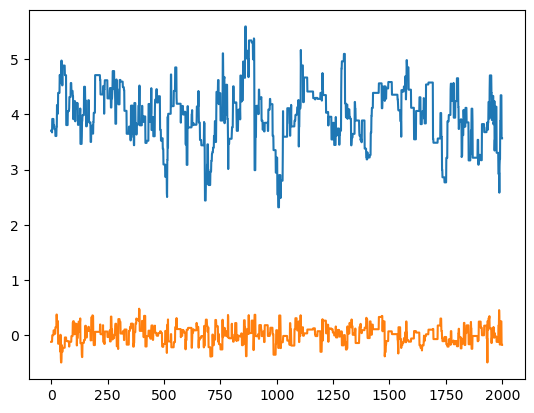

In [99]:
plt.plot(samples["log_taus"]);

array([1.03332728])

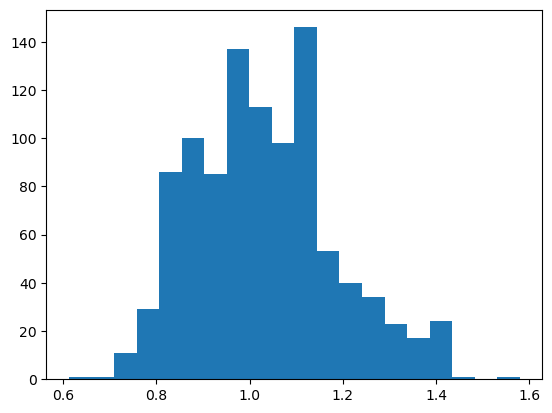

In [100]:
nback_biases = np.exp(samples["log_taus"][num_warmup_samples:,1:])
plt.hist(nback_biases,20);
np.mean(nback_biases,axis=0)

In [44]:
# print(model._D[:5,:5,2])
print(model._Y_compact[:5])
# print(connection_data["D"][:,:,2])
print(model._weights[:5,:5,0])
print(model._weights[:5,:5,1])
# print(model._weight_params)
print(connection_data["D"][:5,:5,2])
# print(connection_data["F"][:5,:5,0])
# print(connection_data["F"][:5,:5,1])
model.weight_params

[1 2 0 0 0]
[[0.         0.         0.         0.         0.        ]
 [0.867923   0.         0.         0.         0.        ]
 [0.9519512  0.867923   0.         0.         0.        ]
 [0.92879962 0.9519512  0.867923   0.         0.        ]
 [0.90621109 0.92879962 0.846815   0.867923   0.        ]]
[[0.         0.         0.         0.         0.        ]
 [0.97567987 0.         0.         0.         0.        ]
 [0.9519512  0.97567987 0.         0.         0.        ]
 [0.92879962 0.9519512  0.97567987 0.         0.        ]
 [0.90621109 0.92879962 0.9519512  0.97567987 0.        ]]
[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0.]]


array([ 3.70416565, -0.11703153])

[1.3]
0.9000000000000001
0.9780000000000001


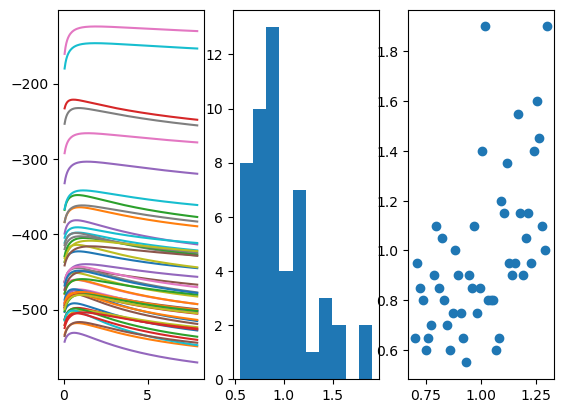

In [80]:
from scipy.stats import gamma
session_lengths = [500]
xx = np.arange(0.05,8,0.05);

pp = np.zeros((50))
ss = np.linspace(0.7,1.3,len(pp))
cc = np.arange(0.7,1.3,)
plt.subplot(1,3,1)
for jj in range(pp.size):
    nback_scales = [ss[jj]];
    seqs, connection_data = hddCRP.simulations.simulate_sequential_hddCRP(session_lengths, session_labels, action_labels, depth, rng_sim, alphas, 
            between_session_time_constants = between_session_time_constants, within_session_time_constant = within_session_time_constant, nback_scales=nback_scales)
    model = hddCRP.behaviorDataHandlers.create_hddCRP(seqs, session_labels, rng=rng_fit, depth=depth, fit_nback_scales=fit_nback_scales)

    model.alpha = alphas

    yy = np.zeros_like(xx)
    for ii,xx_c in enumerate(xx):
        model.weight_params = [np.log(40), np.log(xx_c)]
        yy[ii] = model.compute_log_likelihood() + gamma.logpdf(ss[jj], 20, scale=1/20)
    plt.plot(xx,yy)

    pp[jj] = xx[np.argmax(yy)]

plt.subplot(1,3,2)
plt.hist(pp)
print(nback_scales)
print(np.median(pp))
print(np.mean(pp))


plt.subplot(1,3,3)
plt.scatter(ss,pp)

(array([92.,  4.,  4.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

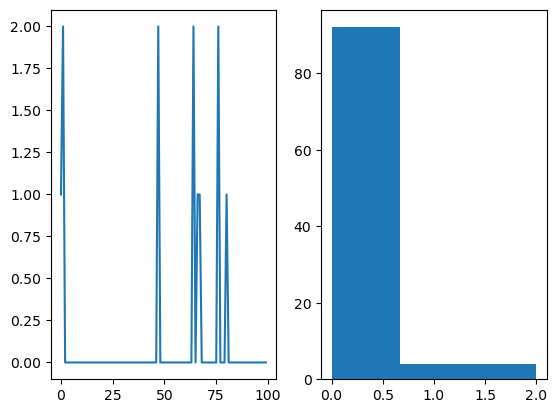